# Assignment 2
## Group Members:
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se
***

## Task 1: Working with a dataset with categorical features
***

### Step 1. Reading the data

In [42]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the data
train_data = pd.read_csv('adult_train.csv')
test_data = pd.read_csv('adult_test.csv')

# Splitting the train and test data into X (input) and Y (output)
X_train = train_data.drop('target', axis=1)
X_test = test_data.drop('target', axis=1)
Y_train = train_data['target']
Y_test = test_data['target']

In [32]:
# Checking the data
X_train.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,27,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States
1,27,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
2,25,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
3,46,Private,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States
4,45,Private,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States


In [33]:
X_test.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [34]:
Y_train.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4     >50K
Name: target, dtype: object

In [35]:
Y_test.head()

0    <=50K
1    <=50K
2     >50K
3     >50K
4    <=50K
Name: target, dtype: object

### Step 2: Encoding the features as numbers.

In [36]:
# Initialize the DictVectorizer
vec = DictVectorizer(sparse=False)

# Convert the training and test data into a list of dictionaries
X_train_dict = X_train.to_dict(orient='records')
X_test_dict = X_test.to_dict(orient='records')

# Apply DictVectorizer to the training and test data
X_train_encoded = vec.fit_transform(X_train_dict)
X_test_encoded = vec.transform(X_test_dict)

# Check the shape of the encoded data
X_train_encoded.shape, X_test_encoded.shape

((32561, 107), (16281, 107))

In [37]:
# Scale the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [38]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=5000)

# Perform cross-validation on the training set
cross_val_scores = cross_val_score(logistic_regression_classifier, X_train_scaled, Y_train, cv=5)

# Calculate the mean accuracy from the cross-validation
mean_cv_accuracy = np.mean(cross_val_scores)

mean_cv_accuracy

0.8513560197691934

### Step 3. Combining the steps.

In [39]:
# Create the pipeline
pipeline = make_pipeline(
    DictVectorizer(sparse=False),
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

# Train the pipeline
pipeline.fit(X_train_dict, Y_train)

# Perform cross-validation on the pipeline
cross_val_scores = cross_val_score(pipeline, X_train_dict, Y_train, cv=5)

# Calculate the mean accuracy from the cross-validation
mean_cv_accuracy = np.mean(cross_val_scores)

# Evaluate on test data
test_accuracy = pipeline.score(X_test_dict, Y_test)

mean_cv_accuracy, test_accuracy

(0.8513253072384808, 0.8517904305632332)

## Task 2: Decision trees and random forests
***

In [40]:
def evaluate_decision_tree_depths(X_train_dict, Y_train, max_depths):
    cv_scores = {}

    # Initialize the DictVectorizer
    vec = DictVectorizer(sparse=False)

    for depth in max_depths:
        # The pipeline first vectorizes the data and then applies the decision tree classifier
        dt_pipeline = make_pipeline(vec, DecisionTreeClassifier(max_depth=depth))

        # Perform cross-validation and store the mean accuracy for each depth
        scores = cross_val_score(dt_pipeline, X_train_dict, Y_train, cv=5, scoring='accuracy')
        cv_scores[depth] = np.mean(scores)

    return cv_scores

max_depths = range(1, 21)
dt_scores = evaluate_decision_tree_depths(X_train_dict, Y_train, max_depths)
dt_scores

{1: 0.7591904454179904,
 2: 0.8282301726164002,
 3: 0.8437702604618773,
 4: 0.8443845110761279,
 5: 0.8488684651109801,
 6: 0.8543964188425267,
 7: 0.8554098852003044,
 8: 0.855532707029713,
 9: 0.8547342519647909,
 10: 0.857897515307695,
 11: 0.8573754258634498,
 12: 0.8557784638622963,
 13: 0.8526459177656782,
 14: 0.8505882913817047,
 15: 0.848438329351503,
 16: 0.846012195039141,
 17: 0.8418047999634826,
 18: 0.8392250652729695,
 19: 0.8392556693454898,
 20: 0.836522405010429}

In [41]:
def evaluate_random_forest(X_train_dict, Y_train, n_estimators_list, max_depths):
    # Initialize the rf_scores and DictVectorizer
    rf_scores = {}
    vec = DictVectorizer(sparse=False)

    for n_estimators in n_estimators_list:
        for depth in max_depths:
            # The pipeline vectorizes the data and applied the RandomForestClassifier
            rf_pipeline = make_pipeline(vec, RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, n_jobs=-1))

            # Perform cross-validation and store the mean accuracy for each combination
            scores = cross_val_score(rf_pipeline, X_train_dict, Y_train, cv=5, scoring='accuracy')
            rf_scores[(n_estimators, depth)] = np.mean(scores)

    return rf_scores

n_estimators_list = [10, 50, 100, 200]
max_depths = range(1, 21)
rf_scores = evaluate_random_forest(X_train_dict, Y_train, n_estimators_list, max_depths)

In [43]:
def plot_dt_scores(dt_scores):
    plt.figure(figsize=(10, 6))
    depths = list(dt_scores.keys())
    scores = list(dt_scores.values())

    plt.plot(depths, scores, marker='o')
    plt.xlabel('Max Depth of Tree')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Classifier Performance')
    plt.grid(True)
    plt.show()

In [44]:
def plot_rf_scores(rf_scores, n_estimators_list):
    plt.figure(figsize=(12, 8))

    for n_estimators in n_estimators_list:
        depths = [depth for (estimators, depth), score in rf_scores.items() if estimators == n_estimators]
        scores = [score for (estimators, depth), score in rf_scores.items() if estimators == n_estimators]

        plt.plot(depths, scores, marker='o', label=f'{n_estimators} Trees')

    plt.xlabel('Max Depth of Trees')
    plt.ylabel('Accuracy')
    plt.title('Random Forest Classifier Performance')
    plt.legend()
    plt.grid(True)
    plt.show()

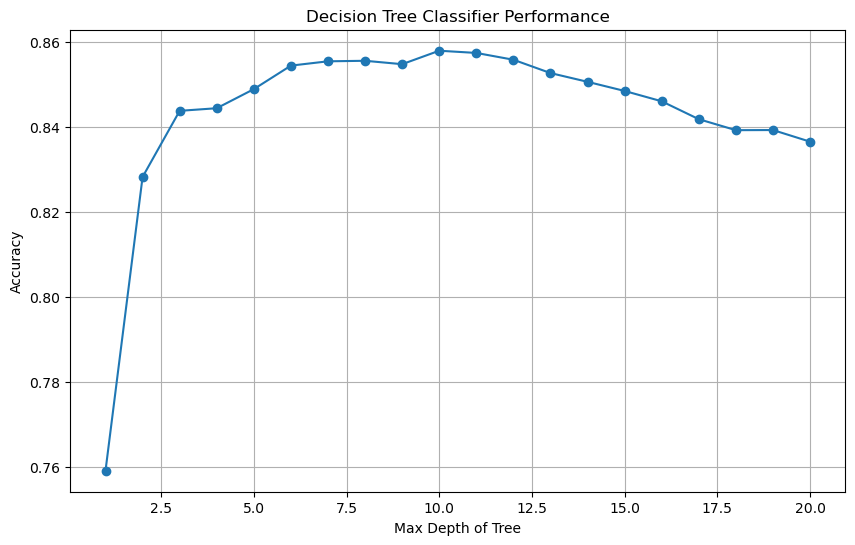

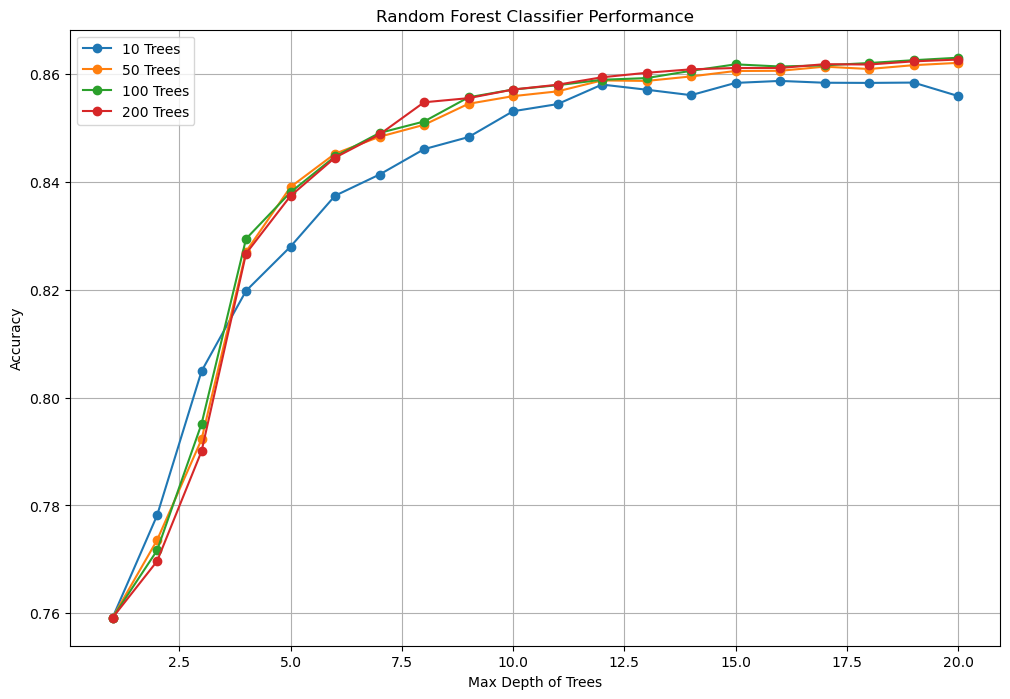

In [45]:
plot_dt_scores(dt_scores)
plot_rf_scores(rf_scores, n_estimators_list)

### Discussion:
#### What's the difference between the curve for a decision tree and for a random forest with an ensemble size of 1, and why do we see this difference?
- **Decision Tree Curve:** It shows an increase in accuracy as the depth increases initially to which then it plateaus or slightly declines suggesting that overfitting might be in play when the tree becomes too deep.
- **Random Forest with Ensemble Size of 1:**  If a Random Forest had only one tree the curve would essentially be that of a single decision tree since Random Forest is an ensemble of decision trees Therefore there would be no curve is presented for a Random Forest with a single tree, but if it were, it would closely follow the curve of the Decision Tree Classifier.

#### What happens with the curve for random forests as the ensemble size grows?
- As the ensemble size grows, the curves become smoother and the accuracy plateaus at a higher level for deeper trees. This is because Random Forests reduce overfitting by averaging the results of individual trees which tend to have high variance when they are deep.

#### What happens with the best observed test set accuracy as the ensemble size grows?
- As the ensemble size increases the best observed test set accuracy typically improves reaching an optimum threshold. This trend reflects the ensemble model's defense against overfitting achieved through using the collective insights of numerous decision trees which in turn helps its generalization abiliyu beyond those of an individual deeply structured tree.

#### What happens with the training time as the ensemble size grows?
- The training time increases with the ensemble size. More trees mean more computation as each tree has to be trained independently of the others. The use of the n_jobs=-1 parameter allows for parallel computation which can mitigate this by using all available CPU cores. However, the increase in computational load is still significant hence the training time will increase.

## Task 3: Feature importances in random forest classifiers
***